In [1]:
import numpy as np
import fbprophet
from fbprophet import Prophet

In [2]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [60]:
df["Country/Region"].values

array(['Afghanistan', 'Albania', 'Algeria', ..., 'Comoros', 'Tajikistan',
       'Lesotho'], dtype=object)

In [63]:
import plotly.express as px
plt.style.use("ggplot")

Here I want to plot the map of the world and show the variation of confirmed cases accross countries.

In [66]:
df_country = df.groupby(["Country/Region"])["Confirmed"].sum().reset_index()

In [67]:
df_country.head()

,Country/Region,Confirmed
0,Afghanistan,1936390
1,Albania,196702
2,Algeria,1179755
3,Andorra,94404
4,Angola,22662


In [69]:
df_country["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [70]:
df_country["Country/Region"] = df_country["Country/Region"].str.upper()

In [71]:
df_country.head()

,Country/Region,Confirmed
0,AFGHANISTAN,1936390
1,ALBANIA,196702
2,ALGERIA,1179755
3,ANDORRA,94404
4,ANGOLA,22662


In [72]:
df_country.shape

(187, 2)

In [73]:
for i in df_country["Country/Region"].values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES"         

In [74]:
df_country["Country/Region"].unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA',
       'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL',
       'BRUNEI', 'BULGARIA', 'BURKINA FASO', 'BURMA', 'BURUNDI',
       'CABO VERDE', 'CAMBODIA', 'CAMEROON', 'CANADA',
       'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE', 'CHINA', 'COLOMBIA',
       'COMOROS', 'CONGO (BRAZZAVILLE)', 'CONGO (KINSHASA)', 'COSTA RICA',
       "COTE D'IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS', 'CZECHIA', 'DENMARK',
       'DJIBOUTI', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT',
       'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA',
       'ESWATINI', 'ETHIOPIA', 'FIJI', 'FINLAND', 'FRANCE', 'GABON',
       'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GREENLAND',
       'GRENADA', 'GUATEMALA', 'GUINEA', 'G

In [75]:
import plotly.graph_objs as go 
from plotly.offline import plot

In [77]:
data = dict(type='choropleth',
            locations=df_country["Country/Region"],
            locationmode='country names',            
            z=df_country["Confirmed"],
            ) 

layout = dict(geo = dict(scope='world',
                          showlakes= False)
              )

choromap = go.Figure(data=[data], layout=layout)
plot(choromap)

'temp-plot.html'

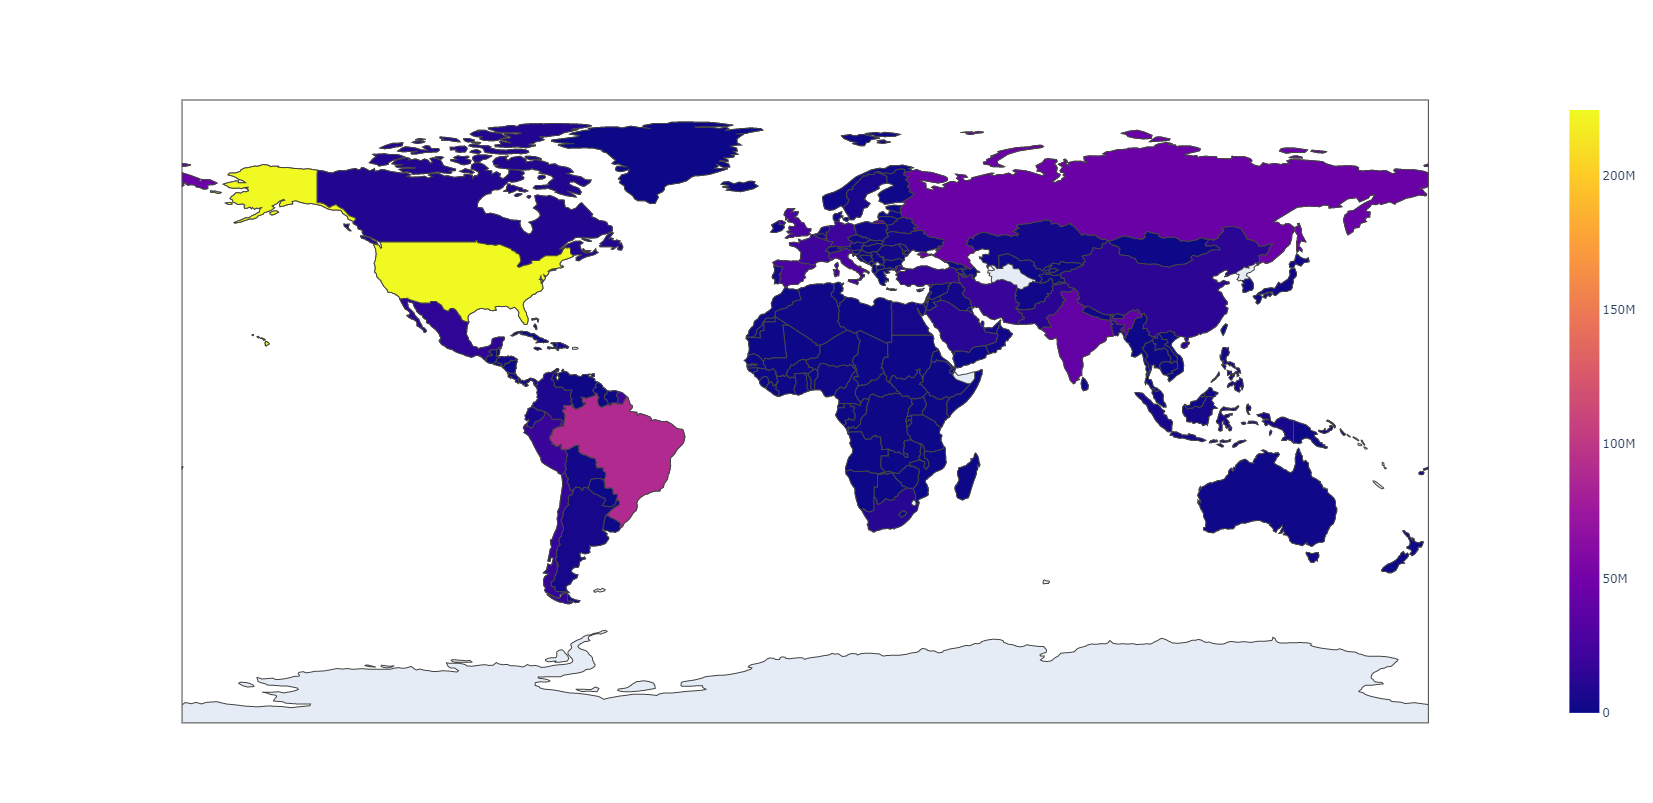

In [79]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename ="D:/DataScience/Udemy_Courses/Times_Series_Analysis/Predict_Covid_19_Cases/covid-19_Confirmed_Cases.png", width=1000, height=1000)

Here we plot the variation of confirmed cases acrross countries in the world. One can plot also the variation of the death or recovered cases etc.

In [62]:
df["Country/Region"].nunique()

187

In [6]:
df.shape

(49068, 10)

In [7]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [10]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [11]:
df.Date.nunique()

188

We can see here that there are some duplicate date in the data. SO we have to group the data based on the "Date" feature.

In [12]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [14]:
total = df.groupby(["Date"])["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

In [15]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


We have to rename the columns with "dsa and "y" to match the default setting of prophet.

In [16]:
df_prophet = total.rename(columns = {"Date": "ds", "Confirmed":"y"})

In [17]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


Now we will initialize our prophet model 

In [18]:
m = Prophet()

In [19]:
model = m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [54]:
future_global = model.make_future_dataframe(periods=30, freq="D")

In [55]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [50]:
future_global.shape

(458, 1)

In [24]:
df_prophet.shape

(188, 5)

In [25]:
df_prophet.tail()

,ds,y,Deaths,Recovered,Active
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


In [56]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


Let's do a prediction on our future data.

In [57]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.442597e+03,-1.302201e+05,7.615763e+04,-9.442597e+03,-9.442597e+03,-11020.784517,-11020.784517,-11020.784517,-11020.784517,-11020.784517,-11020.784517,0.0,0.0,0.0,-2.046338e+04
1,2020-01-23,-6.733154e+03,-1.068133e+05,1.042538e+05,-6.733154e+03,-6.733154e+03,-1125.853264,-1125.853264,-1125.853264,-1125.853264,-1125.853264,-1125.853264,0.0,0.0,0.0,-7.859008e+03
2,2020-01-24,-4.023711e+03,-9.544533e+04,1.109462e+05,-4.023711e+03,-4.023711e+03,10071.381114,10071.381114,10071.381114,10071.381114,10071.381114,10071.381114,0.0,0.0,0.0,6.047670e+03
3,2020-01-25,-1.314268e+03,-9.708011e+04,1.186563e+05,-1.314268e+03,-1.314268e+03,13754.786209,13754.786209,13754.786209,13754.786209,13754.786209,13754.786209,0.0,0.0,0.0,1.244052e+04
4,2020-01-26,1.395175e+03,-1.048748e+05,1.082552e+05,1.395175e+03,1.395175e+03,7265.249724,7265.249724,7265.249724,7265.249724,7265.249724,7265.249724,0.0,0.0,0.0,8.660424e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.143603e+07,2.107692e+07,2.183838e+07,2.107169e+07,2.181470e+07,13754.786209,13754.786209,13754.786209,13754.786209,13754.786209,13754.786209,0.0,0.0,0.0,2.144979e+07
214,2020-08-23,2.164001e+07,2.125136e+07,2.208132e+07,2.125599e+07,2.203975e+07,7265.249724,7265.249724,7265.249724,7265.249724,7265.249724,7265.249724,0.0,0.0,0.0,2.164727e+07
215,2020-08-24,2.184398e+07,2.143026e+07,2.227847e+07,2.143902e+07,2.226037e+07,-2117.124528,-2117.124528,-2117.124528,-2117.124528,-2117.124528,-2117.124528,0.0,0.0,0.0,2.184186e+07
216,2020-08-25,2.204796e+07,2.160781e+07,2.247916e+07,2.162570e+07,2.249012e+07,-16827.654737,-16827.654737,-16827.654737,-16827.654737,-16827.654737,-16827.654737,0.0,0.0,0.0,2.203113e+07


In [28]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [29]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.144979e+07,2.108064e+07,2.181453e+07
214,2020-08-23,2.164727e+07,2.123664e+07,2.201161e+07
215,2020-08-24,2.184186e+07,2.141633e+07,2.226232e+07
216,2020-08-25,2.203113e+07,2.157338e+07,2.244814e+07
217,2020-08-26,2.224091e+07,2.173228e+07,2.269742e+07


Let's plot the results.

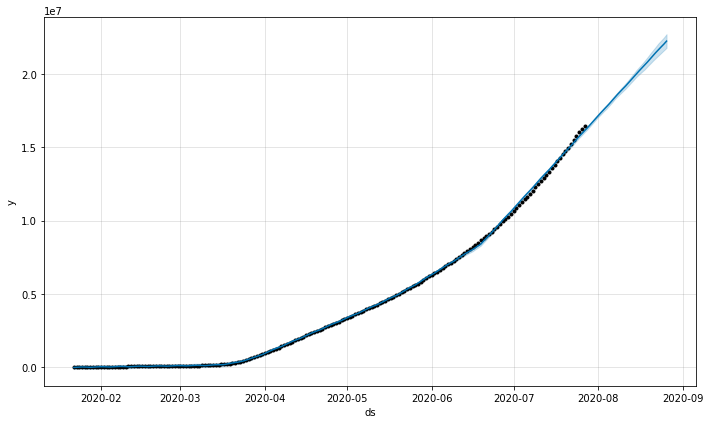

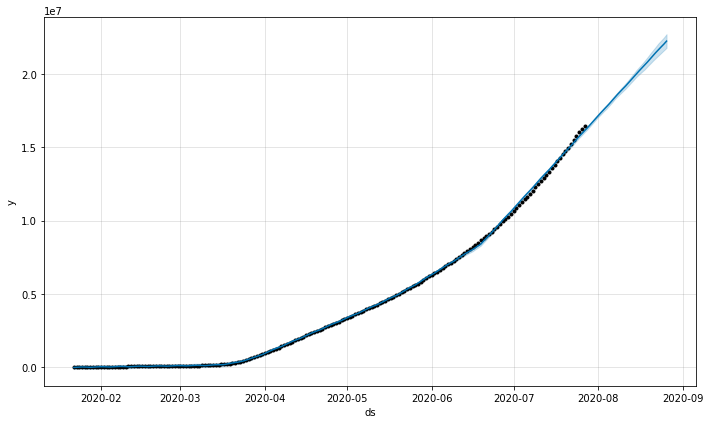

In [58]:
model.plot(prediction)

We can see clearly that the model is predicting an increase of cases of covid-19 in the next 30 days.

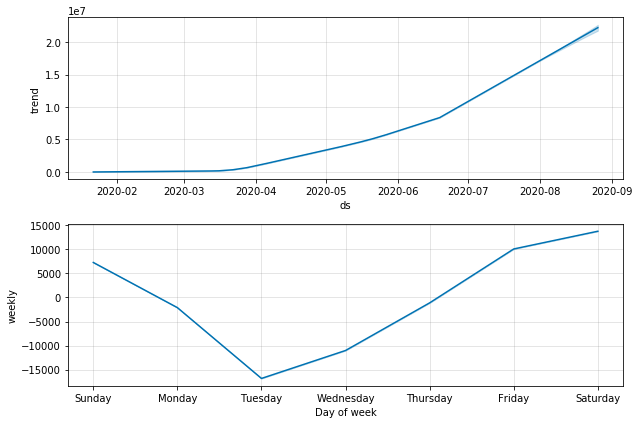

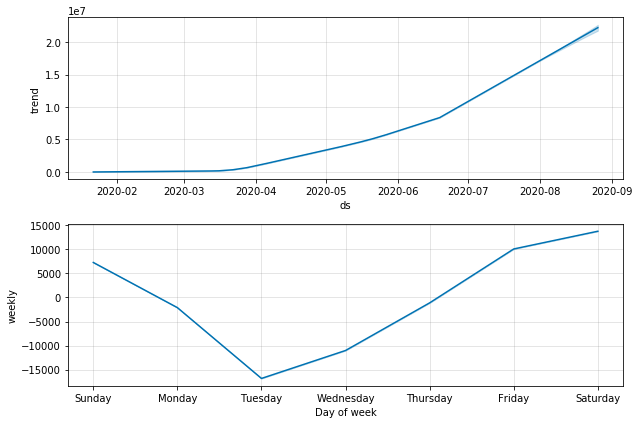

In [31]:
model.plot_components(prediction)

Let's see on which points my trend changes.

In [32]:
from fbprophet.plot import add_changepoints_to_plot

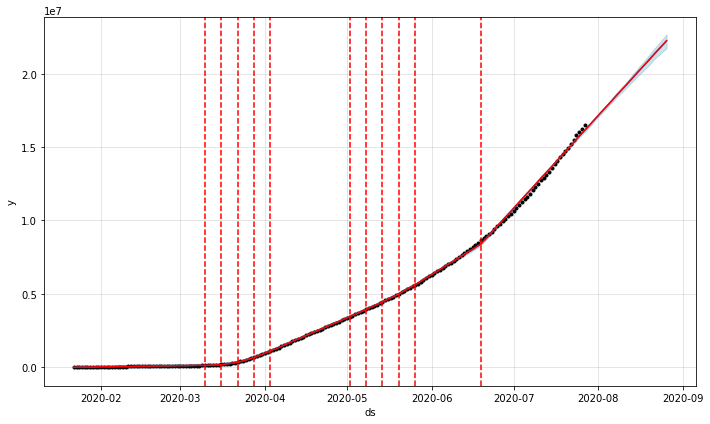

In [33]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

Cross validation of our model

In [34]:
from fbprophet.diagnostics import cross_validation

In [35]:
df_cv = cross_validation(model, horizon = "30 days", period = "15 days", initial = "90 days")

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [36]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195651e+06,3.205964e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279815e+06,3.291047e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.362114e+06,3.377778e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439918e+06,3.461926e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.515919e+06,3.548094e+06,3515244,2020-04-28


In [37]:
df_cv.shape

(150, 6)

Let's obtain the performance Metrics for the model

In [38]:
from fbprophet.diagnostics import performance_metrics

In [39]:
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.734027e+10,165348.931087,129431.358585,0.016891,0.017757,0.000000
1,4 days,3.785342e+10,194559.544188,151631.005758,0.019354,0.022570,0.000000
2,5 days,5.188416e+10,227780.950594,175469.999783,0.021805,0.025668,0.000000
3,6 days,6.959707e+10,263812.565401,202455.218191,0.024582,0.026665,0.066667
4,7 days,9.039824e+10,300662.993476,232805.679804,0.027863,0.031221,0.133333


In [40]:
from fbprophet.plot import plot_cross_validation_metric

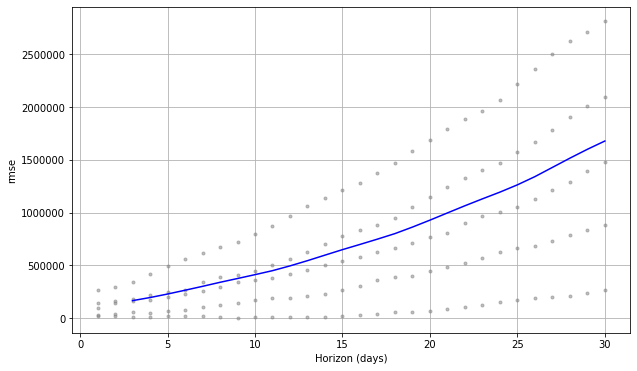

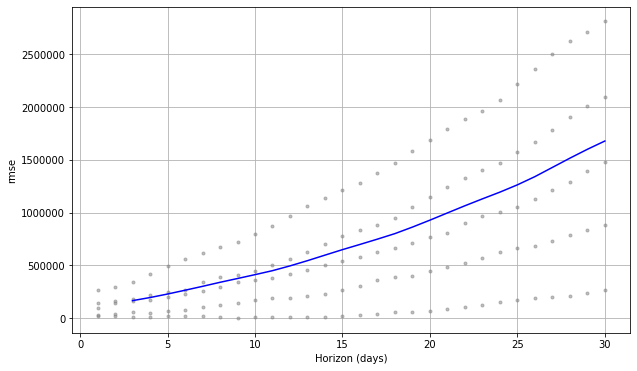

In [41]:
plot_cross_validation_metric(df_cv, metric='rmse')

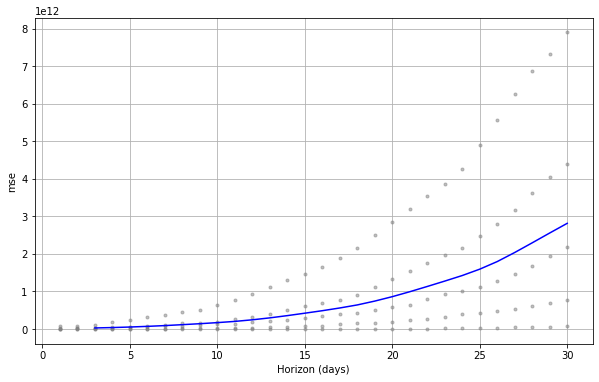

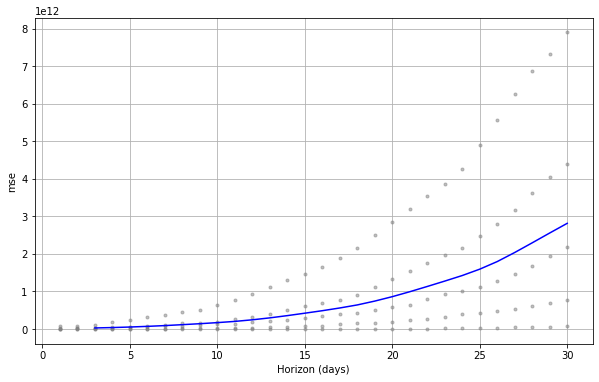

In [42]:
plot_cross_validation_metric(df_cv, metric='mse')

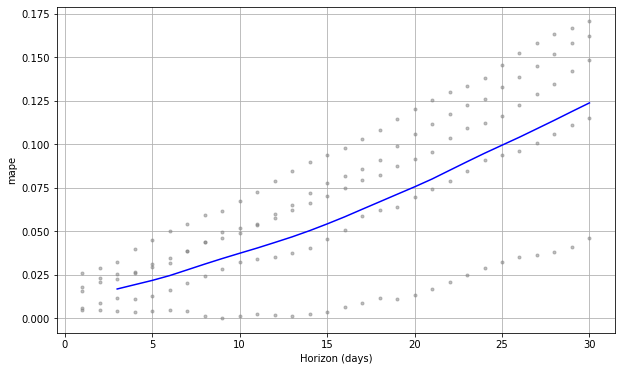

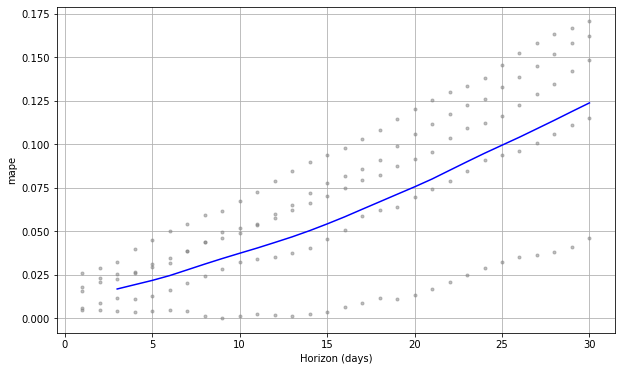

In [43]:
plot_cross_validation_metric(df_cv, metric='mape')